In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Model Building
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv('data/stud.csv')
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape


(1000, 8)

### Dependent and Independent Features

###### We are taking Math Score as a dependent feature and rest as Independent features

In [4]:
x=df.drop(columns=['math_score'],axis=1)

In [5]:
y=df['math_score']
# This is a dependent variable

In [6]:
# Creating a column transformer with 3 types of transformers

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns
# Object gives either boolean or categorical data

In [7]:
numeric_transformer=StandardScaler()
categorical_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [('OneHotEncoder',categorical_transformer,cat_features),
     ('StandardScaler',numeric_transformer,num_features)]
)

In [8]:
X=preprocessor.fit_transform(x)

In [9]:
X.shape

# Since there are 5 categorical columns, and for every categorical column there are certain unique values.
# For every unique value, there will be a new column created.
# For Gender, there are 2 unique values, so 2 new columns will be created.
# For Lunch, there are 2 unique values, so 2 new columns will be created.
# For Test Preparation Course, there are 2 unique values, so 2 new columns will be created.
# For Parental Level of Education, there are 6 unique values, so 6 new columns will be created.
# For race or ethnicity, there are 5 unique values, so 5 new columns will be created.
# So, total 17 new columns will be created + 2 numeric columns = 19 columns

(1000, 19)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape


((800, 19), (200, 19))

In [12]:
y_train.shape,y_test.shape

((800,), (200,))

#### Creating an Evaluation Function

In [11]:
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    mae=mean_absolute_error(true,predicted)
    return mse,rmse,r2,mae

In [26]:
models={
    "Linear Regression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Ada Boost Regressor":AdaBoostRegressor(),
    "Cat Boost Regressor":CatBoostRegressor(verbose=False),
    "XG Boost Regressor":XGBRegressor()
    
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    # Making predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # Evaluating the model
    model_train_mse,model_train_rmse,model_train_r2,model_train_mae=evaluate_model(y_train,y_train_pred)
    model_test_mse,model_test_rmse,model_test_r2,model_test_mae=evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance on Training Data')
    print('- Root Mean Squared Error:{:.4f}'.format(model_train_rmse))
    print('- R2 Score:{:.4f}'.format(model_train_r2))
    print('- Mean Absolute Error:{:.4f}'.format(model_train_mae))

    print('Model performance on Testing Data')
    print('- Root Mean Squared Error:{:.4f}'.format(model_test_rmse))
    print('- R2 Score:{:.4f}'.format(model_test_r2))
    print('- Mean Absolute Error:{:.4f}'.format(model_test_mae))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model Performance on Training Data
- Root Mean Squared Error:5.3243
- R2 Score:0.8743
- Mean Absolute Error:4.2671
Model performance on Testing Data
- Root Mean Squared Error:5.3960
- R2 Score:0.8803
- Mean Absolute Error:4.2158


Ridge
Model Performance on Training Data
- Root Mean Squared Error:5.3233
- R2 Score:0.8743
- Mean Absolute Error:4.2650
Model performance on Testing Data
- Root Mean Squared Error:5.3904
- R2 Score:0.8806
- Mean Absolute Error:4.2111


Lasso
Model Performance on Training Data
- Root Mean Squared Error:6.5938
- R2 Score:0.8071
- Mean Absolute Error:5.2063
Model performance on Testing Data
- Root Mean Squared Error:6.5197
- R2 Score:0.8253
- Mean Absolute Error:5.1579


K-Neighbors Regressor
Model Performance on Training Data
- Root Mean Squared Error:5.7077
- R2 Score:0.8555
- Mean Absolute Error:4.5167
Model performance on Testing Data
- Root Mean Squared Error:7.2530
- R2 Score:0.7838
- Mean Absolute Error:5.6210


Decision Tree Regressor


In [27]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2 Score']).sort_values(by='R2 Score',ascending=False)

,Model,R2 Score
1,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.852596
7,Cat Boost Regressor,0.851632
6,Ada Boost Regressor,0.840171
8,XG Boost Regressor,0.827797
2,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.750944


## Linear Regression

In [28]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.03


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted Math Score')

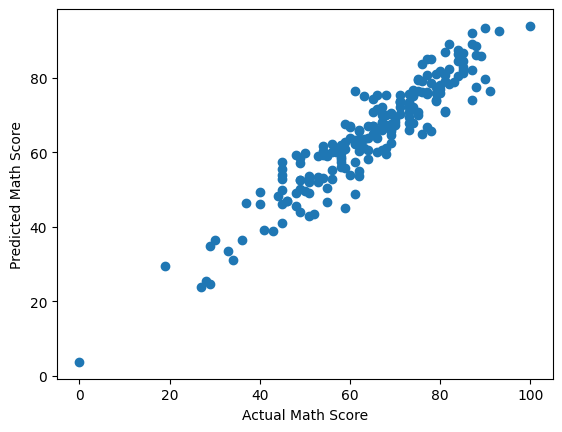

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')

<Axes: xlabel='math_score'>

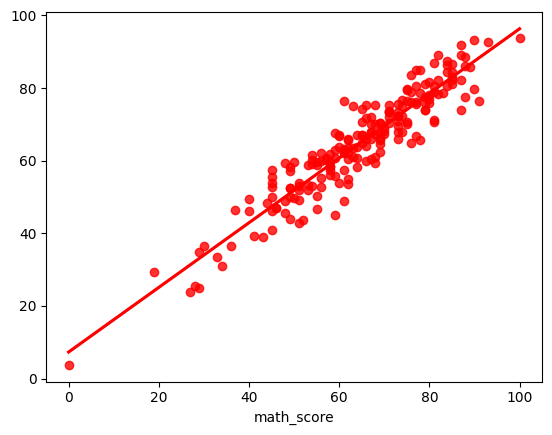

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='r')

### Difference between Actual Values and Predicted Values

In [31]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
